<a href="https://colab.research.google.com/github/jaybeberry9591/graph_theory_assignments/blob/main/kmeans_clustering_using_bd_crime_data_of_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np


In [48]:
path = "/content/drive/MyDrive/Colab Notebooks/crime.csv"

In [49]:
crime_rates = pd.read_csv(path, index_col = 0)

In [50]:
crime_rates.head()

,unit,dacocity,robber,murder,speedy_trail,riot,women_children_repression,kidnapping,police_assault,burglary,theft,other_cases,arms_attack,explosive_attack,narcotic_act,smuggling,total_arms_explosive_narcotic_attack,total_cases
year,,,,,,,,,,,,,,,,,,
2010,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,11279,23519
2010,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,1016,4063
2010,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,826,1767
2010,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,587,1571
2010,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,289,1139


In [51]:
crime_rates.describe()

,dacocity,robber,murder,speedy_trail,riot,women_children_repression,kidnapping,police_assault,burglary,theft,other_cases,arms_attack,explosive_attack,narcotic_act,smuggling,total_arms_explosive_narcotic_attack,total_cases
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,26.072222,45.611111,201.850000,75.911111,4.333333,972.783333,37.522222,34.722222,132.861111,368.672222,4264.494444,95.344444,28.833333,2817.294444,295.555556,3237.027778,9401.861111
std,40.517605,60.305589,293.601761,112.382740,8.263807,1324.042731,50.667991,52.540706,181.954558,515.365779,5641.395295,142.875667,55.691840,4194.012161,541.533218,4545.297653,11774.257629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,15.000000,2.000000,0.000000,11.750000,1.000000,1.000000,2.000000,30.000000,129.500000,3.000000,0.000000,177.500000,2.000000,215.250000,717.500000
50%,6.000000,19.500000,37.000000,21.500000,0.000000,167.000000,12.000000,14.000000,49.000000,116.500000,735.000000,22.500000,4.000000,807.000000,52.500000,874.500000,1983.500000
75%,36.000000,62.250000,278.000000,107.750000,5.000000,1640.500000,54.250000,40.250000,155.250000,477.000000,7003.500000,138.500000,27.250000,3496.250000,201.250000,5002.750000,18547.000000
max,184.000000,294.000000,1395.000000,563.000000,56.000000,5115.000000,204.000000,336.000000,686.000000,2240.000000,22429.000000,723.000000,387.000000,22682.000000,2509.000000,23194.000000,44536.000000


In [52]:
crime_rates.describe()

,dacocity,robber,murder,speedy_trail,riot,women_children_repression,kidnapping,police_assault,burglary,theft,other_cases,arms_attack,explosive_attack,narcotic_act,smuggling,total_arms_explosive_narcotic_attack,total_cases
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,26.072222,45.611111,201.850000,75.911111,4.333333,972.783333,37.522222,34.722222,132.861111,368.672222,4264.494444,95.344444,28.833333,2817.294444,295.555556,3237.027778,9401.861111
std,40.517605,60.305589,293.601761,112.382740,8.263807,1324.042731,50.667991,52.540706,181.954558,515.365779,5641.395295,142.875667,55.691840,4194.012161,541.533218,4545.297653,11774.257629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,15.000000,2.000000,0.000000,11.750000,1.000000,1.000000,2.000000,30.000000,129.500000,3.000000,0.000000,177.500000,2.000000,215.250000,717.500000
50%,6.000000,19.500000,37.000000,21.500000,0.000000,167.000000,12.000000,14.000000,49.000000,116.500000,735.000000,22.500000,4.000000,807.000000,52.500000,874.500000,1983.500000
75%,36.000000,62.250000,278.000000,107.750000,5.000000,1640.500000,54.250000,40.250000,155.250000,477.000000,7003.500000,138.500000,27.250000,3496.250000,201.250000,5002.750000,18547.000000
max,184.000000,294.000000,1395.000000,563.000000,56.000000,5115.000000,204.000000,336.000000,686.000000,2240.000000,22429.000000,723.000000,387.000000,22682.000000,2509.000000,23194.000000,44536.000000


In [53]:
crime_rates = crime_rates.drop(['unit'], axis=1 )

In [54]:
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(crime_rates)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 0.51795149  2.8998196   0.14737774 ... -0.28064447  1.77423024
   1.2023278 ]
 [-0.2492822   1.03743148 -0.36835895 ... -0.36397366 -0.490006
  -0.45469987]
 [-0.57102536 -0.60878659 -0.59036481 ... -0.523225   -0.53192404
  -0.65024548]
 ...
 [-0.59577483 -0.70855739 -0.67916716 ... -0.54359436 -0.68437335
  -0.77995627]
 [-0.64527378 -0.75844278 -0.68599811 ... -0.54729788 -0.69915498
  -0.79043193]
 [-0.64527378 -0.75844278 -0.68941358 ... -0.54729788 -0.71415723
  -0.80073725]]


In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

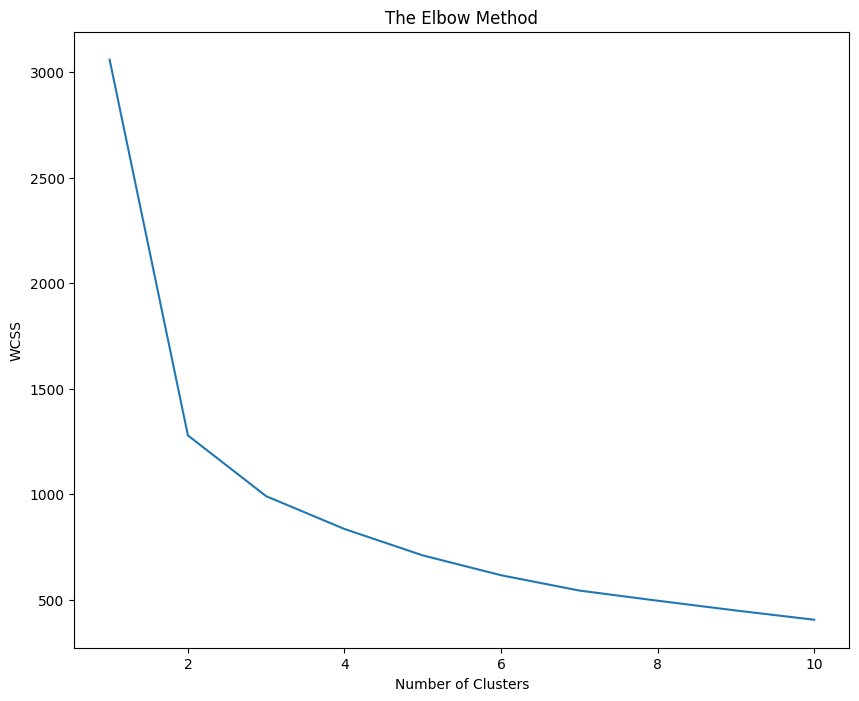

In [56]:
plt.figure(figsize=(10,8))
wcss = []
for i in range (1,11):
  kmeans = KMeans (n_clusters = i , init = 'k-means++', random_state = 42)
  kmeans.fit(crime_rates_standardized)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 3 , init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [58]:
y_kmeans1 = y_kmeans+1
cluster = list(y_kmeans1)
crime_rates['cluster'] = cluster

In [59]:
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster

,dacocity,robber,murder,speedy_trail,riot,women_children_repression,kidnapping,police_assault,burglary,theft,other_cases,arms_attack,explosive_attack,narcotic_act,smuggling,total_arms_explosive_narcotic_attack,total_cases
cluster,,,,,,,,,,,,,,,,,
1,40.6,76.8,431.7,121.4,4.9,2365.4,71.7,39.0,200.3,613.0,10347.2,202.5,72.6,5235.6,1475.2,6985.9,21298.0
2,8.3,16.0,55.5,25.7,2.6,254.3,11.2,11.7,41.6,107.4,1271.9,23.5,7.0,811.2,51.6,893.3,2699.5
3,96.8,157.0,682.6,272.0,12.1,3089.3,130.6,139.9,503.1,1381.1,12819.2,336.7,92.0,10088.6,359.6,10877.0,30160.8


In [60]:
crime_rates[crime_rates['cluster']==1]

,dacocity,robber,murder,speedy_trail,riot,women_children_repression,kidnapping,police_assault,burglary,theft,other_cases,arms_attack,explosive_attack,narcotic_act,smuggling,total_arms_explosive_narcotic_attack,total_cases,cluster
year,,,,,,,,,,,,,,,,,,
2010,74,125,513,110,15,2275,156,25,332,947,9954,211,96,2292,1238,3837,18363,1
2010,54,130,757,276,29,4095,105,35,442,1442,20654,134,10,3614,2509,6267,34286,1
2011,58,124,414,105,5,2796,119,32,395,902,10452,152,60,2168,1047,3427,18829,1
2011,81,146,780,179,22,4735,121,58,385,1388,21174,114,11,2763,2276,5164,34233,1
2012,64,151,482,153,12,2564,167,46,359,761,11275,260,110,3372,1207,4949,20983,1
2012,38,55,464,132,0,2281,54,47,155,554,11932,131,12,3120,2124,5387,21099,1
2012,20,53,354,85,2,2235,53,41,129,607,9586,32,2,1083,959,2076,15241,1
2013,76,126,520,181,1,2309,153,99,356,720,10968,253,148,2286,1873,4560,20069,1
2013,47,63,480,168,0,2161,63,99,134,513,10810,163,100,2716,1896,4875,19413,1


<Axes: xlabel='murder', ylabel='police_assault'>

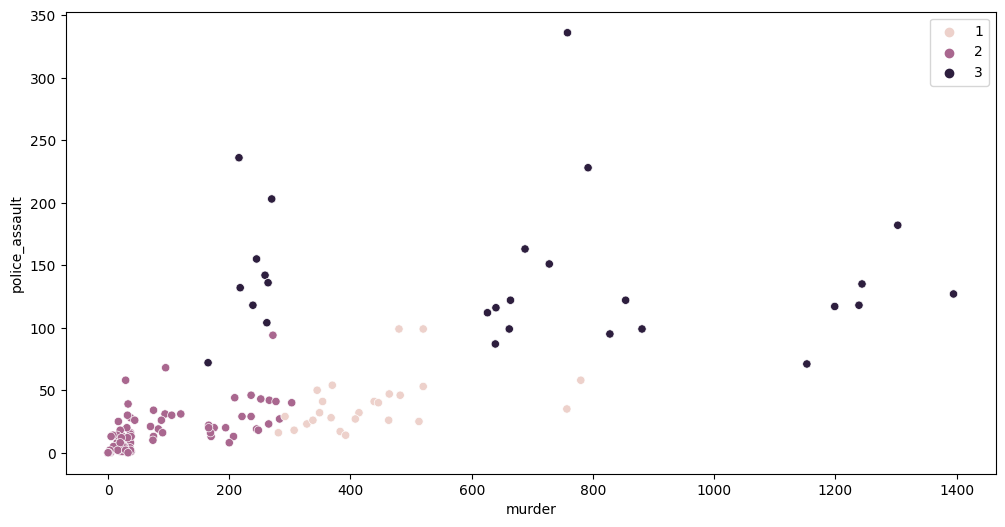

In [61]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['murder'],y=crime_rates['police_assault'],hue=y_kmeans1)

<Axes: xlabel='dacocity', ylabel='robber'>

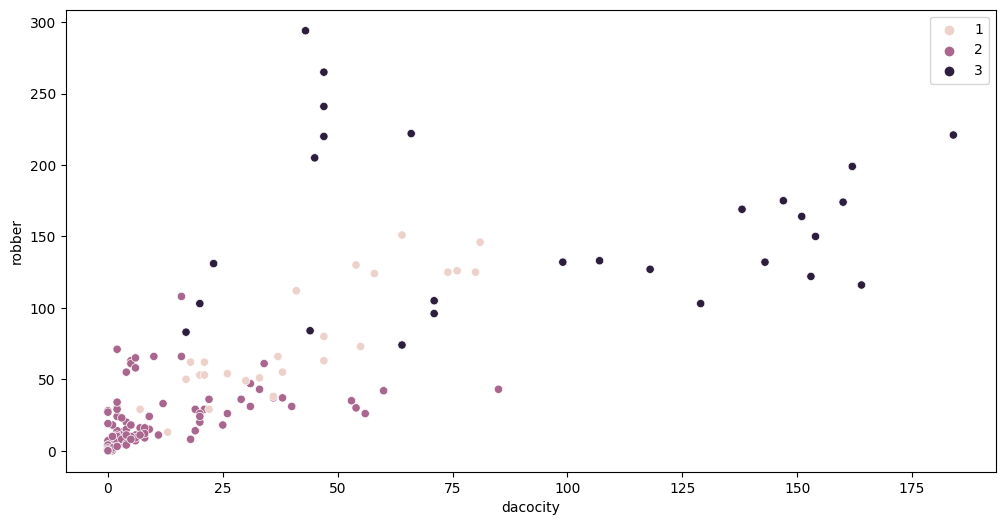

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['dacocity'],y=crime_rates['robber'],hue=y_kmeans1)

<Axes: xlabel='dacocity', ylabel='murder'>

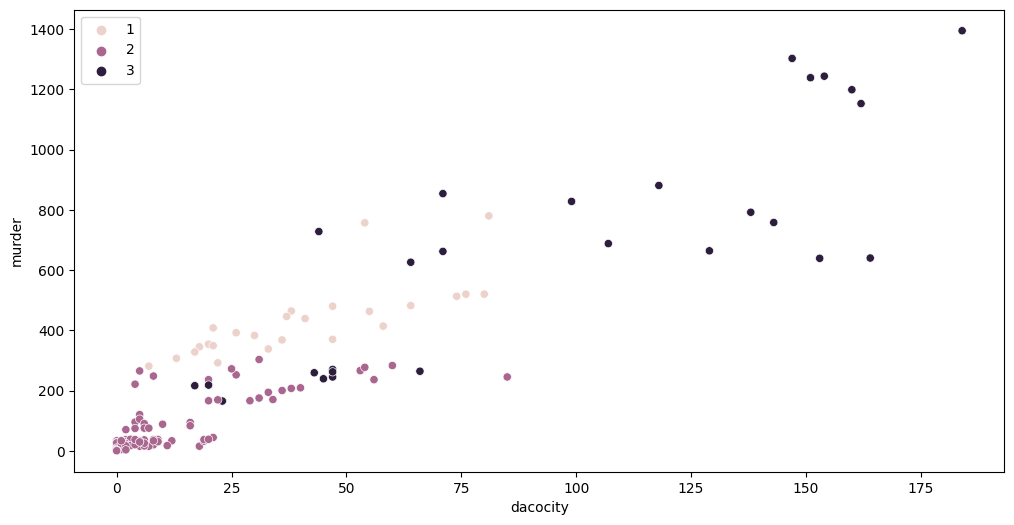

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['dacocity'],y=crime_rates['murder'],hue=y_kmeans1)

In [64]:
from IPython.display import HTML
import base64

df = crime_rates
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [65]:
%%HTML

<div class='tableauPlaceholder' id='viz1558006161579' style='position: relative'>
<noscript>
<a href='#'>
<img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1_rss.png' style='border: none' /></a>
</noscript>

<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='USCrimeRatesClusters&#47;Dashboard' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
</object>
</div>
<script type='text/javascript'>                    var divElement = document.getElementById('viz1558006161579');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='700px';vizElement.style.height='527px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
